In [3]:
import torch 
import numpy as np 
import matplotlib.pyplot as plt 
from torch import nn, optim 
from mpl_toolkits.mplot3d import Axes3D 
from torch.utils.data import Dataset, DataLoader 
torch.manual_seed(1)

In [4]:
class Data(Dataset): 
    def __init__(self): 
        self.x = torch.zeros(20, 2) 
        self.x[:, 0] = torch.arange(-1, 1, 0.1) 
        self.x[:, 1] = torch.arange(-1, 1, 0.1) 
        self.w = torch.tensor([[1.0, -1.0], [1.0, 3.0]]) 
        self.b = torch.tensor([[1.0, -1.0]])
        self.f = torch.mm(self.x, self.w) + self.b 
        self.y = self.f + 0.001 * torch.randn((self.x.shape[0], 1)) 
        self.len = self.x.shape[0] 
    
    def __getitem__(self, index): 
        return self.x[index], self.y[index] 

    def __len__(self):
        return self.len 

In [5]:
data_set = Data()

In [7]:
class LinearRegression(nn.Module): 
    def __init__(self, input_size, output_size): 
        super(LinearRegression, self).__init__() 
        self.linear = nn.Linear(input_size, output_size) 

    def forward(self, x):
        return self.linear(x)

In [9]:
learning_rate = 0.1 
model = LinearRegression(input_size=2, output_size=2)
optimizer = optim.SGD(model.parameters(), lr=learning_rate) 
criterion = nn.MSELoss() 
train_loader = DataLoader(dataset=data_set, batch_size=5)

In [10]:
LOSS = [] 
epochs = 100 
for epoch in range(epochs): 
    for x, y in train_loader: 
        y_hat = model(x) 
        loss = criterion(y_hat, y) 
        LOSS.append(loss.item()) 
        optimizer.zero_grad() 
        loss.backward()
        optimizer.step()

Text(0, 0.5, 'Cost/Total Loss')

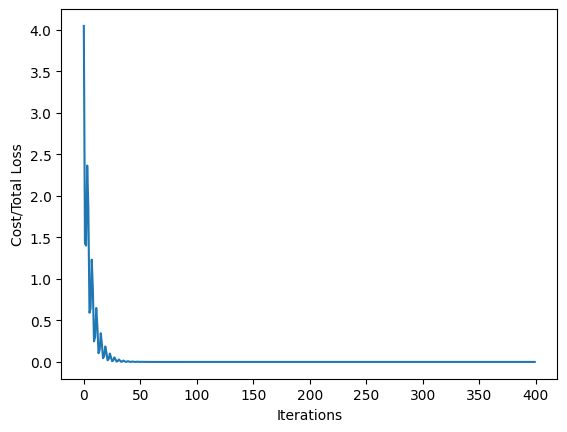

In [11]:
plt.plot(LOSS)
plt.xlabel("Iterations")
plt.ylabel("Cost/Total Loss")